In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [77]:
dataset = pd.read_excel("Spotify reviews.xlsx")
dataset.head()

,Review,Rating
0,"Great music service, the audio is high quality...",5
1,Please ignore previous negative rating. This a...,5
2,"This pop-up ""Get the best Spotify experience o...",4
3,Really buggy and terrible to use as of recently,1
4,Dear Spotify why do I get songs that I didn't ...,1


In [78]:
dataset["Rating"].value_counts()

Rating
5    699
1    614
4    268
3    221
2    197
Name: count, dtype: int64

In [79]:
dataset.shape

(1999, 2)

In [80]:
dataset.isnull().sum()

Review    0
Rating    0
dtype: int64

In [81]:
dataset.duplicated().sum()

0

In [82]:
dataset.drop_duplicates(inplace= True)

In [83]:
dataset.duplicated().sum()

0

In [84]:
dataset["Rating"].value_counts()

Rating
5    699
1    614
4    268
3    221
2    197
Name: count, dtype: int64

<Axes: xlabel='Rating'>

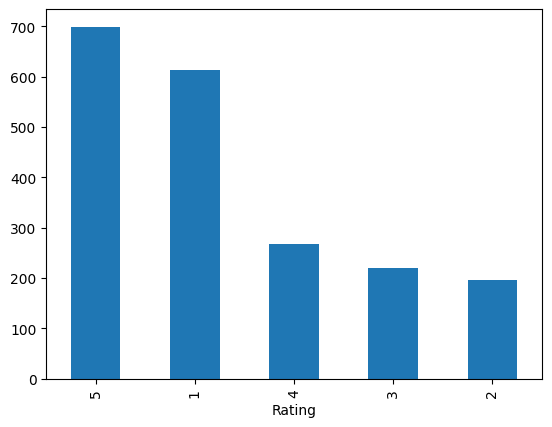

In [85]:
dataset["Rating"].value_counts().plot(kind = "bar")

In [86]:
def fetch_ratings(x):
    if x == 5: 
        return "Positive"

    if x == 1 :
        return "Negative"

    return "Neutral"

In [87]:
dataset["Rating"] = dataset["Rating"].apply(fetch_ratings)

In [88]:
dataset.head()

,Review,Rating
0,"Great music service, the audio is high quality...",Positive
1,Please ignore previous negative rating. This a...,Positive
2,"This pop-up ""Get the best Spotify experience o...",Neutral
3,Really buggy and terrible to use as of recently,Negative
4,Dear Spotify why do I get songs that I didn't ...,Negative


In [89]:
dataset["Rating"].value_counts()

Rating
Positive    699
Neutral     686
Negative    614
Name: count, dtype: int64

In [90]:
# lowecasing

In [91]:
dataset["Review"] = dataset["Review"].str.lower()

In [92]:
dataset.head()

,Review,Rating
0,"great music service, the audio is high quality...",Positive
1,please ignore previous negative rating. this a...,Positive
2,"this pop-up ""get the best spotify experience o...",Neutral
3,really buggy and terrible to use as of recently,Negative
4,dear spotify why do i get songs that i didn't ...,Negative


In [93]:
# remove url

In [94]:
import re

In [95]:
def remove_url(text):
    pattern = re.compile(r"https?://\s+\www\.\.s+")
    return pattern.sub(r" ",text)
    

In [96]:
dataset["Review"] = dataset["Review"].apply(remove_url)

In [97]:
#remove punctuations

In [98]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [99]:
punctuations = string.punctuation

In [100]:
def remove_punctuations(text):
    return text.translate(str.maketrans(" "," ",punctuations))

In [101]:
dataset["Review"] = dataset["Review"].apply(remove_punctuations)

In [102]:
dataset.head()

,Review,Rating
0,great music service the audio is high quality ...,Positive
1,please ignore previous negative rating this ap...,Positive
2,this popup get the best spotify experience on ...,Neutral
3,really buggy and terrible to use as of recently,Negative
4,dear spotify why do i get songs that i didnt p...,Negative


In [103]:
#spelling correction

In [104]:
dataset.head()

,Review,Rating
0,great music service the audio is high quality ...,Positive
1,please ignore previous negative rating this ap...,Positive
2,this popup get the best spotify experience on ...,Neutral
3,really buggy and terrible to use as of recently,Negative
4,dear spotify why do i get songs that i didnt p...,Negative


In [105]:
#remove emoji

In [106]:
import emoji

In [107]:
def demojize_emoji(text):
    return emoji.demojize(text)

In [108]:
dataset["Review"] = dataset["Review"].apply(demojize_emoji)

In [109]:
dataset.head()

,Review,Rating
0,great music service the audio is high quality ...,Positive
1,please ignore previous negative rating this ap...,Positive
2,this popup get the best spotify experience on ...,Neutral
3,really buggy and terrible to use as of recently,Negative
4,dear spotify why do i get songs that i didnt p...,Negative


In [110]:
import nltk
nltk.download("punkt")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shabi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [111]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shabi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [112]:
dataset['num_characters'] = dataset['Review'].astype(str).apply(len)

In [113]:
dataset["num_words"] = dataset["Review"].astype("str").apply(lambda x : len(nltk.word_tokenize(x)))

In [114]:
dataset["num_sentenses"] = dataset["Review"].astype("str").apply(lambda x : len(nltk.sent_tokenize(x)))

In [115]:
dataset.head()

,Review,Rating,num_characters,num_words,num_sentenses
0,great music service the audio is high quality ...,Positive,109,21,1
1,please ignore previous negative rating this ap...,Positive,83,15,1
2,this popup get the best spotify experience on ...,Neutral,100,19,1
3,really buggy and terrible to use as of recently,Negative,47,9,1
4,dear spotify why do i get songs that i didnt p...,Negative,95,21,1


In [116]:
dataset.describe()

,num_characters,num_words,num_sentenses
count,1999.000000,1999.000000,1999.0
mean,144.790895,28.329165,1.0
std,118.391502,23.147084,0.0
min,10.000000,3.000000,1.0
25%,54.000000,11.000000,1.0
50%,109.000000,21.000000,1.0
75%,199.000000,39.000000,1.0
max,535.000000,118.000000,1.0


In [117]:
def fetch_output(x):
    if x == "Positive":
        return 2
    if x == "Negative":
        return 0
    return 1

In [118]:
dataset["Rating"] = dataset["Rating"].apply(fetch_output)

In [119]:
dataset.head()

,Review,Rating,num_characters,num_words,num_sentenses
0,great music service the audio is high quality ...,2,109,21,1
1,please ignore previous negative rating this ap...,2,83,15,1
2,this popup get the best spotify experience on ...,1,100,19,1
3,really buggy and terrible to use as of recently,0,47,9,1
4,dear spotify why do i get songs that i didnt p...,0,95,21,1


In [120]:
dataset.corr(numeric_only=True)["Rating"]

Rating            1.000000
num_characters   -0.288691
num_words        -0.283605
num_sentenses          NaN
Name: Rating, dtype: float64

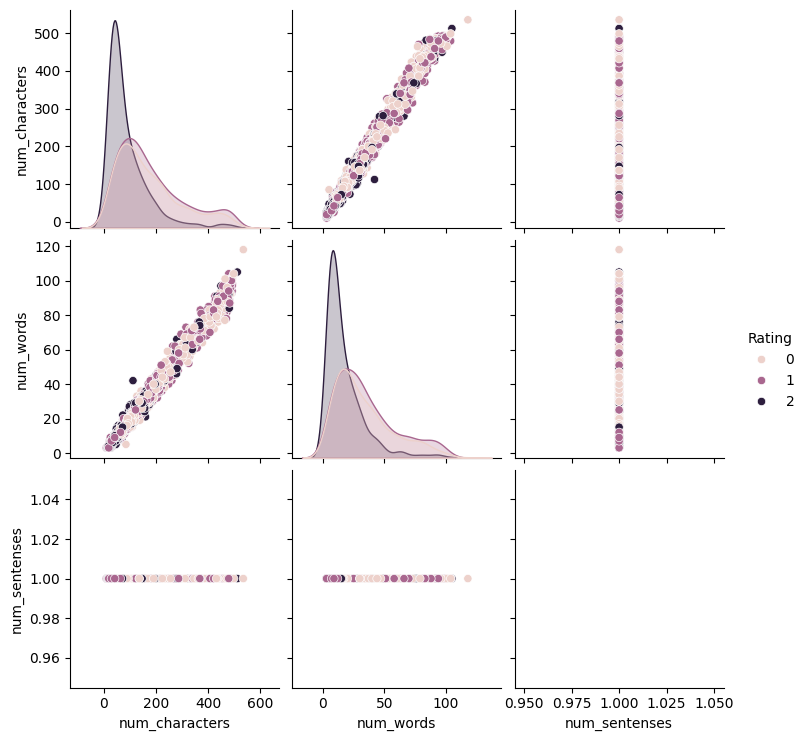

In [121]:
sns.pairplot(dataset , hue= "Rating")

In [122]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [123]:
def remove_stopwords(text):
    new_text = []

    for word in text.split():
        if word in stopwords.words("english"):
            new_text.append("")

        else:
            new_text.append(word)

    x = new_text.copy()
    new_text.clear()
    return " ".join(x)
    

In [124]:
dataset["Review"] = dataset["Review"].apply(remove_stopwords)

In [125]:
dataset.head()

,Review,Rating,num_characters,num_words,num_sentenses
0,great music service audio high quality app...,2,109,21,1
1,please ignore previous negative rating app s...,2,83,15,1
2,popup get best spotify experience android 1...,1,100,19,1
3,really buggy terrible use recently,0,47,9,1
4,dear spotify get songs didnt put playli...,0,95,21,1


In [165]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [166]:
ps = PorterStemmer()

In [167]:
def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

In [168]:
dataset["Review"] = dataset["Review"].apply(stem_words)

In [169]:
from sklearn.feature_extraction.text import CountVectorizer        #bag of words
cv = CountVectorizer()

In [173]:
x = cv.fit_transform(dataset["Review"]).toarray()

In [174]:
dataset

,Review,Rating
0,great music servic audio high qualiti app easi...,2
1,pleas ignor previou neg rate app super great g...,2
2,popup get best spotifi experi android 12 annoy...,1
3,realli buggi terribl use recent,0
4,dear spotifi get song didnt put playlist shuff...,0
...,...,...
1994,pl fix bug cant open spotifi sinc yesterday 07...,0
1995,sound clear easi use,1
1996,far good love app make collect playlist easi,2
1997,final spotifi put lyric avail long time,1


In [175]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [176]:
y = dataset["Rating"].values

In [177]:
y

array([2, 2, 1, ..., 2, 1, 1], dtype=int64)

In [178]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split( x , y , test_size= 0.2 , random_state=2)

In [1]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [180]:
from sklearn.metrics import confusion_matrix , precision_score , accuracy_score

In [181]:
gnb.fit(x_train , y_train)
y_predict_1 = gnb.predict(x_test)

print("ACCURACY :" ,accuracy_score(y_test , y_predict_1))
print("\n PRECISION :" , precision_score(y_test , y_predict_1 , average="macro"))
print("\n CONFUSION MATRIX :\n" , confusion_matrix(y_test , y_predict_1))

ACCURACY : 0.5475

 PRECISION : 0.5512438815158702

 CONFUSION MATRIX :
 [[ 75  22  38]
 [ 53  44  37]
 [ 21  10 100]]


In [182]:
mnb.fit(x_train , y_train)
y_predict_2 = mnb.predict(x_test)

print("ACCURACY :" ,accuracy_score(y_test , y_predict_2))
print("\n PRECISION :" , precision_score(y_test , y_predict_2 ,average= "macro"))
print("\n CONFUSION MATRIX :\n" , confusion_matrix(y_test , y_predict_2))

ACCURACY : 0.6525

 PRECISION : 0.6672689629211369

 CONFUSION MATRIX :
 [[ 72  58   5]
 [ 26  81  27]
 [  1  22 108]]


In [183]:
bnb.fit(x_train , y_train)
y_predict_3 = bnb.predict(x_test)

print("ACCURACY :" ,accuracy_score(y_test , y_predict_3))
print("\n PRECISION :" , precision_score(y_test , y_predict_3 , average="macro"))
print("\n CONFUSION MATRIX :\n" , confusion_matrix(y_test , y_predict_3))

ACCURACY : 0.5825

 PRECISION : 0.5905651340996169

 CONFUSION MATRIX :
 [[ 53  44  38]
 [ 26  61  47]
 [  1  11 119]]


In [184]:
from sklearn.feature_extraction.text import TfidfVectorizer        #tfidf
tfidf = TfidfVectorizer()

In [185]:
x = tfidf.fit_transform(dataset["Review"]).toarray()
y = dataset["Rating"].values

In [186]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split( x , y , test_size= 0.2 , random_state=2)

In [187]:
gnb.fit(x_train , y_train)
y_predict_1 = gnb.predict(x_test)

print("ACCURACY :" ,accuracy_score(y_test , y_predict_1))
print("\n PRECISION :" , precision_score(y_test , y_predict_1 , average="macro"))
print("\n CONFUSION MATRIX :\n" , confusion_matrix(y_test , y_predict_1))

ACCURACY : 0.5475

 PRECISION : 0.5452402977842385

 CONFUSION MATRIX :
 [[72 28 35]
 [46 51 37]
 [20 15 96]]


In [188]:
mnb.fit(x_train , y_train)
y_predict_2 = mnb.predict(x_test)

print("ACCURACY :" ,accuracy_score(y_test , y_predict_2))
print("\n PRECISION :" , precision_score(y_test , y_predict_2 , average="macro"))
print("\n CONFUSION MATRIX :\n" , confusion_matrix(y_test , y_predict_2))

ACCURACY : 0.635

 PRECISION : 0.6627220875233515

 CONFUSION MATRIX :
 [[ 58  71   6]
 [ 21  88  25]
 [  1  22 108]]


In [189]:
bnb.fit(x_train , y_train)
y_predict_3 = bnb.predict(x_test)

print("ACCURACY :" ,accuracy_score(y_test , y_predict_3))
print("\n PRECISION :" , precision_score(y_test , y_predict_3 , average="macro"))
print("\n CONFUSION MATRIX :\n" , confusion_matrix(y_test , y_predict_3))

ACCURACY : 0.5825

 PRECISION : 0.5905651340996169

 CONFUSION MATRIX :
 [[ 53  44  38]
 [ 26  61  47]
 [  1  11 119]]


In [190]:
# bow with multinomial

In [191]:
x = tfidf.fit_transform(dataset["Review"]).toarray()
y = dataset["Rating"].values

In [192]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split( x , y , test_size= 0.2 , random_state=2)

In [193]:
mnb.fit(x_train , y_train)
y_predict_2 = mnb.predict(x_test)

print("ACCURACY :" ,accuracy_score(y_test , y_predict_2))
print("\n PRECISION :" , precision_score(y_test , y_predict_2 ,average= "macro"))
print("\n CONFUSION MATRIX :\n" , confusion_matrix(y_test , y_predict_2))

ACCURACY : 0.635

 PRECISION : 0.6627220875233515

 CONFUSION MATRIX :
 [[ 58  71   6]
 [ 21  88  25]
 [  1  22 108]]


<Figure size 1200x600 with 0 Axes>

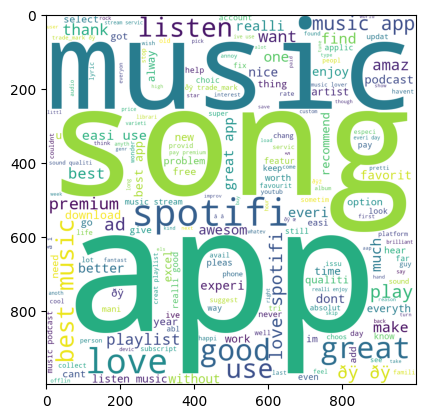

In [194]:
#word cloud for positive

from wordcloud import WordCloud
wc = WordCloud (width = 1000 , height=1000 , min_font_size=10 , background_color="white")

wc.generate(dataset[dataset["Rating"] == 2]["Review"].str.cat(sep=" "))

pos_wc = wc.generate(dataset[dataset["Rating"] == 2]["Review"].str.cat(sep=" "))

plt.figure(figsize=(12,6))
plt.show()
plt.imshow(pos_wc)

<Figure size 1200x600 with 0 Axes>

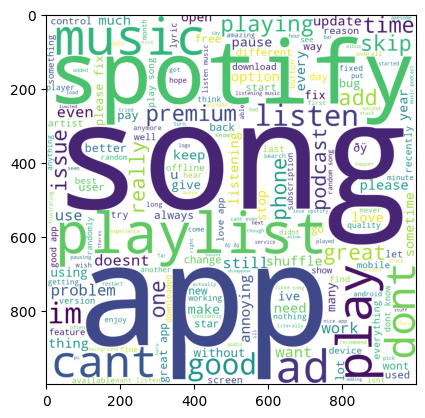

In [162]:
#word cloud for neutral

from wordcloud import WordCloud
wc = WordCloud (width = 1000 , height=1000 , min_font_size=10 , background_color="white")

wc.generate(dataset[dataset["Rating"] == 1]["Review"].str.cat(sep=" "))

new_wc = wc.generate(dataset[dataset["Rating"] == 1]["Review"].str.cat(sep=" "))

plt.figure(figsize=(12,6))
plt.show()
plt.imshow(new_wc)

<Figure size 1200x600 with 0 Axes>

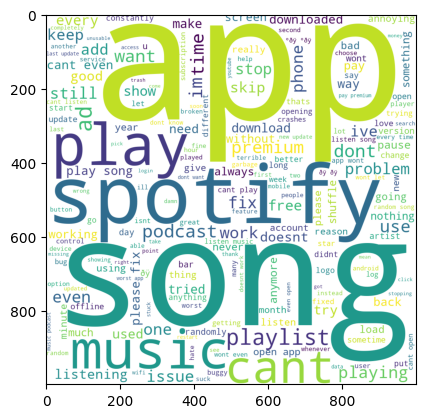

In [163]:
#word cloud for negative

from wordcloud import WordCloud
wc = WordCloud (width = 1000 , height=1000 , min_font_size=10 , background_color="white")

wc.generate(dataset[dataset["Rating"] == 0]["Review"].str.cat(sep=" "))

neg_wc = wc.generate(dataset[dataset["Rating"] == 0]["Review"].str.cat(sep=" "))

plt.figure(figsize=(12,6))
plt.show()
plt.imshow(neg_wc)

In [164]:
import pickle
pickle.dump(tfidf,open('vectorizer_spotify_reviews.pkl','wb'))
pickle.dump(mnb,open('model_mnb_spotify_reviews.pkl','wb'))